In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from model_house import calc_area
from calc_designed_indices import calc_designed_indices

# グラフ描画に用いる関数

In [2]:
DISPLAY = False

In [3]:
def draw_hist_graphs(region, v, std=[None, None, None, None, None, None, None, None], is_region8=True):
    
    fig = plt.figure(figsize=(14,16))

    for r in range(8 if is_region8 else 7):
        ax = fig.add_subplot(4,2,r+1)
        d = ax.hist(v[region==r+1], bins=100)
        ax.set_title('region ' +  str(r+1) + '   n = ' + str(len(v[region==r+1])) )
        ax.plot([std[r], std[r]], [0.0, np.max(d[0])], color='r')
    
    plt.show()

In [4]:
def draw_hist_graphs_double(region, v1, v2, label1, label2, std, is_region8):
    
    fig = plt.figure(figsize=(14,16))

    for r in range(8 if is_region8 else 7):
        ax = fig.add_subplot(4,2,r+1)
        d1 = ax.hist(v1[region==r+1], bins=100, alpha=0.3, color='b', label=label1)
        d2 = ax.hist(v2[region==r+1], bins=100, alpha=0.3, color='r', label=label2)
        ax.set_title('region ' +  str(r+1) + '   n = ' + str(len(v1[region==r+1])) )
        ax.plot([std[r], std[r]], [0.0, max(np.max(d1[0]), np.max(d2[0]))], color='r')
    
    plt.legend()
    
    plt.show()

In [5]:
def draw_bar_graphs(region, v, label):
    
    fig = plt.figure(figsize=(14,16))
    
    for r in range(8):
        ax = fig.add_subplot(4,2,r+1)
        ax.bar(range(len(label)), [np.count_nonzero(v[region==r+1] == s) for s in label], tick_label=label)
        ax.set_title('region ' +  str(r+1) + '   n = ' + str(len(v[region==r+1])) )

    plt.show()

In [6]:
def draw_scatter_graphs(region, v1, v2):
    
    fig = plt.figure(figsize=(14,20))
    
    for r in range(8):
        ax = fig.add_subplot(4,2,r+1)
        ax.scatter(v1[region==r+1], v2[region==r+1])
        ax.plot([0,np.max(v1[region==r+1])], [0,np.max(v2[region==r+1])], 'r')
        ax.set_xlabel('detail')
        ax.set_ylabel('simple')
        ax.set_title('region ' +  str(r+1) + '   n = ' + str(len(v1[region==r+1])) )

    
    plt.show()

# ファイルの読み込み

In [7]:
f_envelope = open('envelope_spec.json', 'r')
data_envelope = json.load(f_envelope)
if DISPLAY:
    data_envelope

In [8]:
f_house = open('house_spec.json', 'r')
data_house = json.load(f_house)
if DISPLAY:
    data_house

# 乱数の発生

## 簡易法における窓面積比率

In [9]:
r_open_simple = 0.121

## 発生する住戸の数

地域別に発生する個数を決定する。

In [10]:
#n=[8846, 27162, 23568, 58558, 191733, 609302, 38467, 16488]
n=[885, 2716, 2357, 5856, 19173, 60930, 3847, 1649]

## 地域の区分

In [11]:
region = np.concatenate([np.repeat([r+1], n[r]) for r in range(8)])

## 外皮性能（地域別）

In [12]:
envelope = np.concatenate([
    np.exp(np.random.multivariate_normal(
        mean=data_envelope['group1']['mean'], cov=data_envelope['group1']['cov'], size=n[0])).T,
    np.exp(np.random.multivariate_normal(
        mean=data_envelope['group1']['mean'], cov=data_envelope['group1']['cov'], size=n[1])).T,
    np.exp(np.random.multivariate_normal(
        mean=data_envelope['group2']['mean'], cov=data_envelope['group2']['cov'], size=n[2])).T,
    np.exp(np.random.multivariate_normal(
        mean=data_envelope['group2']['mean'], cov=data_envelope['group2']['cov'], size=n[3])).T,
    np.exp(np.random.multivariate_normal(
        mean=data_envelope['group3']['mean'], cov=data_envelope['group3']['cov'], size=n[4])).T,
    np.exp(np.random.multivariate_normal(
        mean=data_envelope['group3']['mean'], cov=data_envelope['group3']['cov'], size=n[5])).T,
    np.exp(np.random.multivariate_normal(
        mean=data_envelope['group3']['mean'], cov=data_envelope['group3']['cov'], size=n[6])).T,
    np.exp(np.random.multivariate_normal(
        mean=data_envelope['group4']['mean'], cov=data_envelope['group4']['cov'], size=n[7])).T
], axis=1)

In [13]:
upper_u = envelope[0,:]
wall_u = envelope[1,:]
lower_u = envelope[2,:]
base_psi_outside = envelope[3,:]
base_psi_inside = envelope[4,:]
window_u = envelope[5,:]
window_attachment_u = envelope[6,:]
window_eta = envelope[7,:]
window_attachment_eta = envelope[8,:]

### 上部のU値

In [14]:
if DISPLAY:
    draw_hist_graphs(region, upper_u)

### 外壁のU値

In [15]:
if DISPLAY:
    draw_hist_graphs(region, wall_u)

### 下部のU値

In [16]:
if DISPLAY:
    draw_hist_graphs(region, lower_u)

### 土間床外壁側のψ値

In [17]:
if DISPLAY:
    draw_hist_graphs(region, base_psi_outside)

### 土間床床下側のψ値

In [18]:
if DISPLAY:
    draw_hist_graphs(region, base_psi_inside)

### 窓のU値

In [19]:
if DISPLAY:
    draw_hist_graphs(region, window_u)

### 窓（障子）のU値

In [20]:
if DISPLAY:
    draw_hist_graphs(region, window_attachment_u)

### 窓のη値

In [21]:
if DISPLAY:
    draw_hist_graphs(region, window_eta)

### 窓（障子）のη値

In [22]:
if DISPLAY:
    draw_hist_graphs(region, window_attachment_eta)

## 階数（地域別）

In [23]:
story = np.concatenate([
    np.random.choice(a=data_house['story']['a'], size=n[0], p=data_house['story']['p']['region_1']),
    np.random.choice(a=data_house['story']['a'], size=n[1], p=data_house['story']['p']['region_2']),
    np.random.choice(a=data_house['story']['a'], size=n[2], p=data_house['story']['p']['region_3']),
    np.random.choice(a=data_house['story']['a'], size=n[3], p=data_house['story']['p']['region_4']),
    np.random.choice(a=data_house['story']['a'], size=n[4], p=data_house['story']['p']['region_5']),
    np.random.choice(a=data_house['story']['a'], size=n[5], p=data_house['story']['p']['region_6']),
    np.random.choice(a=data_house['story']['a'], size=n[6], p=data_house['story']['p']['region_7']),
    np.random.choice(a=data_house['story']['a'], size=n[7], p=data_house['story']['p']['region_8']),
])

In [24]:
if DISPLAY:
    draw_bar_graphs(region, story, data_house['story']['a'])

## 床面積

In [25]:
floor_area = np.exp(np.random.normal(
    loc=data_house['floor_area']['log_ave'], scale=data_house['floor_area']['log_std'], size=sum(n)))

In [26]:
if DISPLAY:
    plt.hist(floor_area, bins=100)
    plt.show()

## アスペクト比

In [27]:
aspect_ratio = np.exp(np.random.normal(
    loc=data_house['aspect_ratio']['log_ave'], scale=data_house['aspect_ratio']['log_std'], size=sum(n)))

In [28]:
if DISPLAY:
    plt.hist(aspect_ratio, bins=100)
    plt.show()

形状係数への変更

$$ f_s = \frac{2 \times (l + r \times l)}{4 \times \sqrt{l \times l \times r}} = \frac{1 + r}{2 \sqrt{r}} $$ 

In [29]:
f_s = (1 + aspect_ratio)/(2*aspect_ratio**0.5)

In [30]:
if DISPLAY:
    plt.hist(f_s, bins=100)
    plt.show()

## 主たる方位

In [31]:
direction = np.random.choice(
    a=data_house['direction']['a'], size=sum(n), p=data_house['direction']['p'])

In [32]:
if DISPLAY:
    plt.bar(
        x=range(8),
        height=[np.count_nonzero(direction == d) for d in data_house['direction']['a']],
        tick_label=data_house['direction']['a'])
    plt.show()

## 開口部比率

In [33]:
opening_ratio = np.exp(np.random.normal(
    loc=data_house['opening_ratio']['log_ave'], scale=data_house['opening_ratio']['log_std'], size=sum(n)))

In [34]:
if DISPLAY:
    plt.hist(opening_ratio, bins=100)
    plt.show()

# 住宅の作成

## 当該住宅

In [35]:
house = np.vectorize(calc_area)(
    house_type='detached',
    a_f_total=floor_area,
    r_open=opening_ratio*0.01,
    shape_factor=f_s,
    floor_ins_type='floor',
    bath_ins_type='base')

## 面積固定住宅

In [36]:
house_simple = np.vectorize(calc_area)(
    house_type='detached',
    a_f_total=90.0,
    r_open=r_open_simple,
    floor_ins_type='floor',
    bath_ins_type='base')

# 指標の計算

## 当該住宅

In [37]:
u_a, eta_ah, eta_ac = np.vectorize(calc_designed_indices)(
    house, region, direction,
    upper_u, wall_u, lower_u, base_psi_outside, base_psi_inside,
    window_u, window_attachment_u, window_eta, window_attachment_eta, 1/0.3, 20.0)

In [38]:
u_a_00, eta_ah_00, eta_ac_00 = np.vectorize(calc_designed_indices)(
    house, region, direction,
    upper_u, wall_u, lower_u, base_psi_outside, base_psi_inside,
    window_u, window_attachment_u, window_eta, window_attachment_eta, 20.0, 20.0)

In [39]:
u_a_03, eta_ah_03, eta_ac_03 = np.vectorize(calc_designed_indices)(
    house, region, direction,
    upper_u, wall_u, lower_u, base_psi_outside, base_psi_inside,
    window_u, window_attachment_u, window_eta, window_attachment_eta, 1/0.3, 1/0.3)

## 面積固定住宅

In [40]:
u_a_simple, eta_ah_simple, eta_ac_simple = np.vectorize(calc_designed_indices)(
    house_simple, region, 'sw',
    upper_u, wall_u, lower_u, base_psi_outside, base_psi_inside,
    window_u, window_attachment_u, window_eta, window_attachment_eta, 1/0.3, 20.0)

# 比較

## 基準値

In [41]:
u_a_std = [0.46, 0.46, 0.56, 0.75, 0.87, 0.87, 0.87, None]
eta_ah_std = [None, None, None, None, None, None, None, None]
eta_ac_std = [None, None, None, None, 0.03, 0.028, 0.027, 0.032]

## 散布図

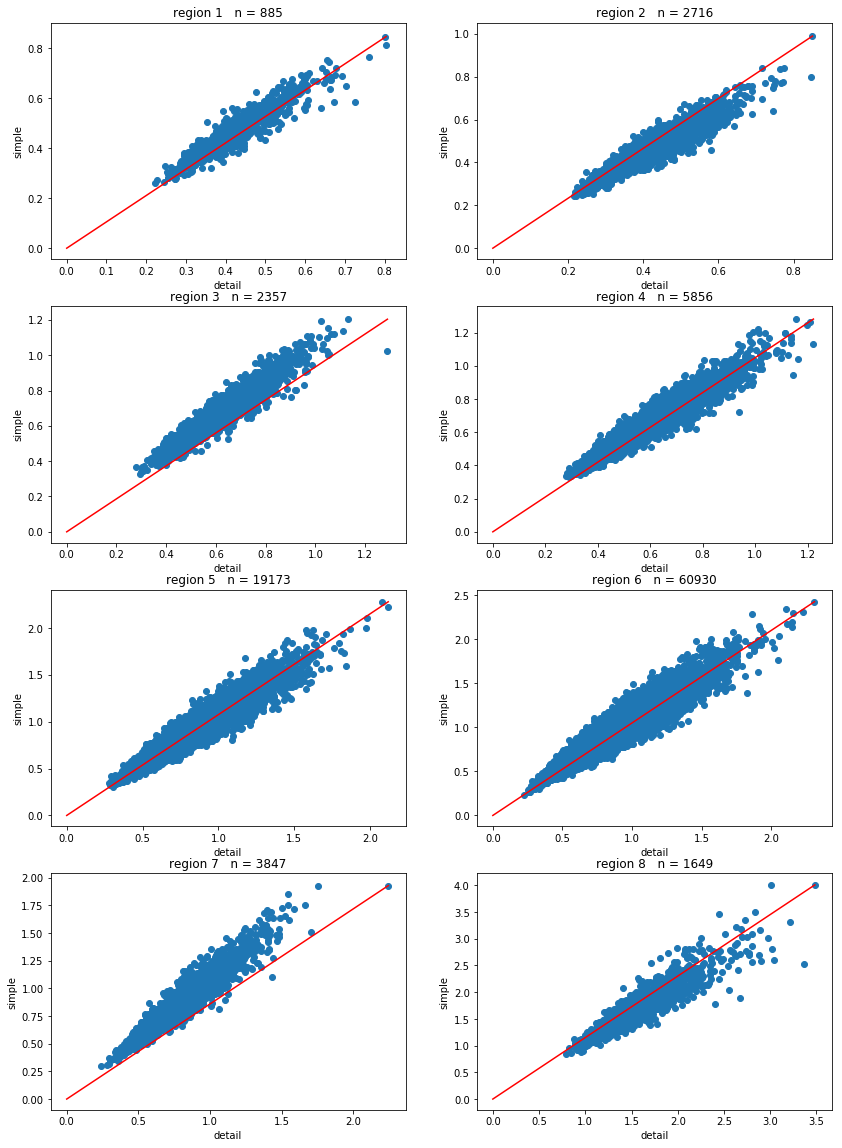

In [42]:
draw_scatter_graphs(region, u_a, u_a_simple)

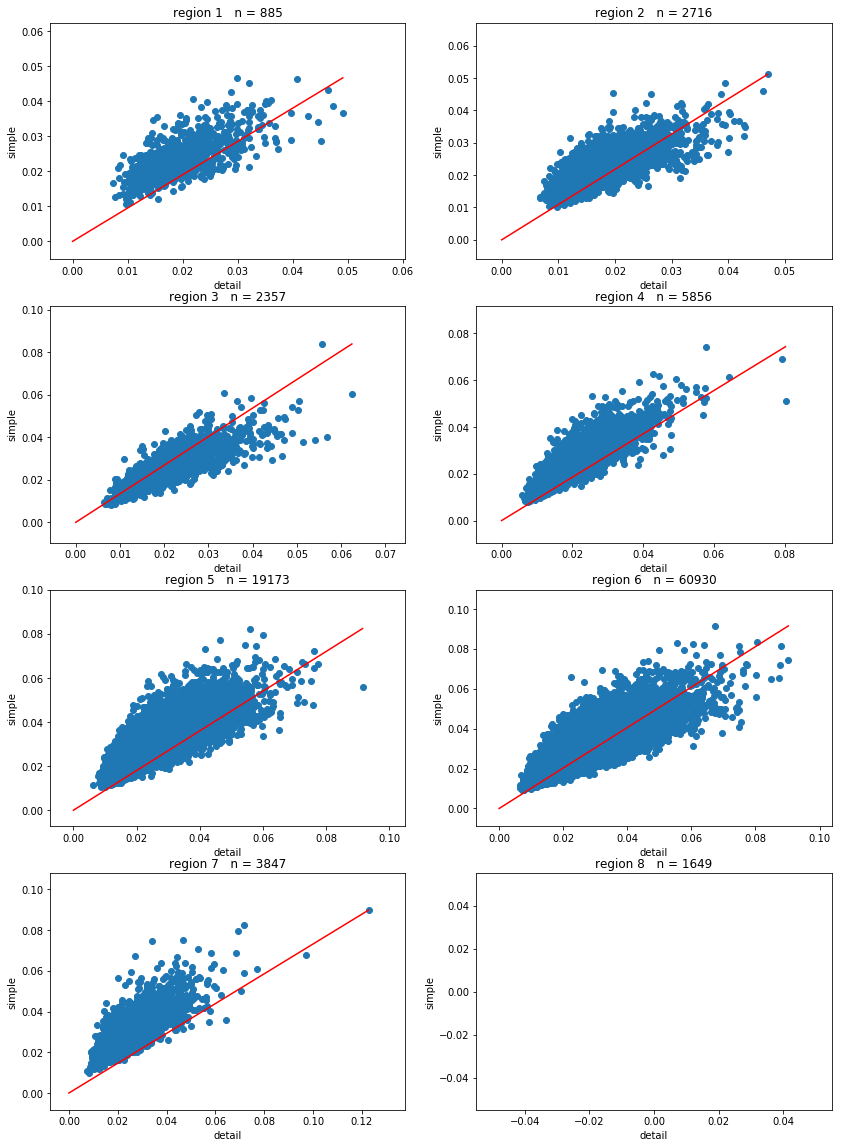

In [43]:
draw_scatter_graphs(region, eta_ah, eta_ah_simple)

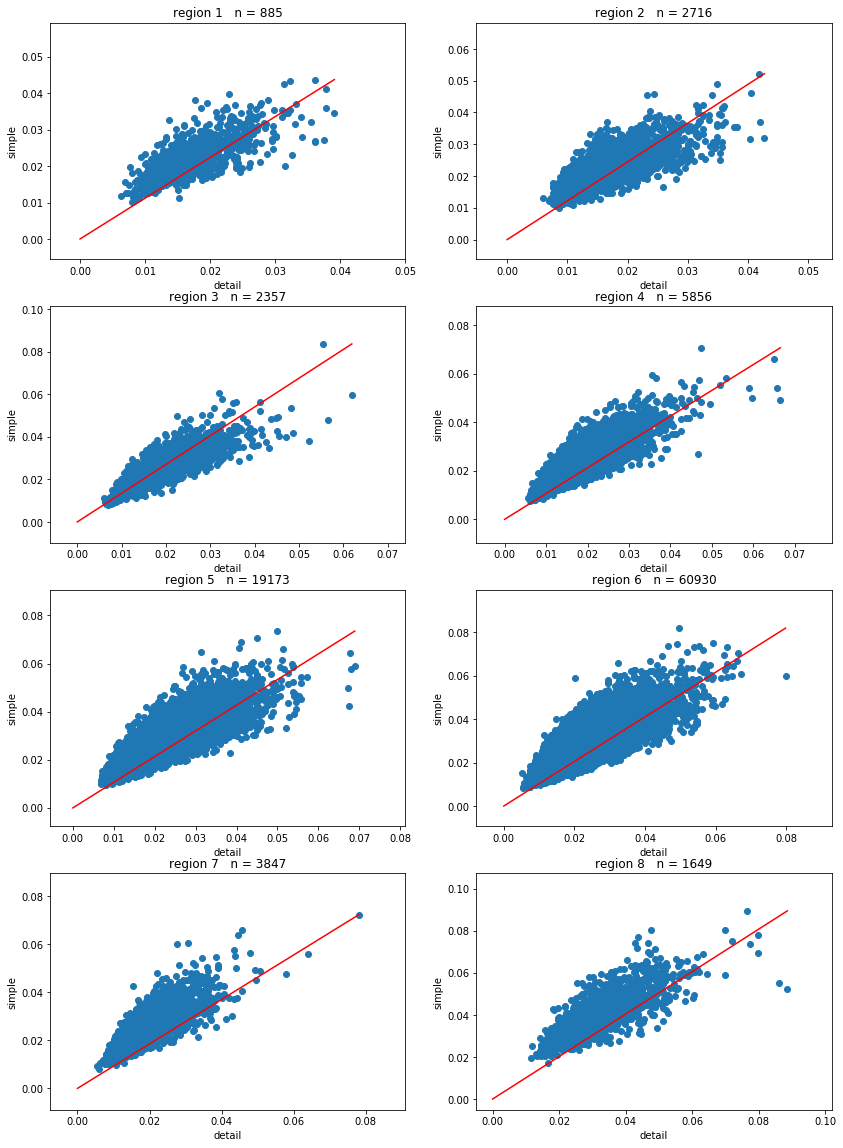

In [44]:
draw_scatter_graphs(region, eta_ac, eta_ac_simple)

## ヒストグラム

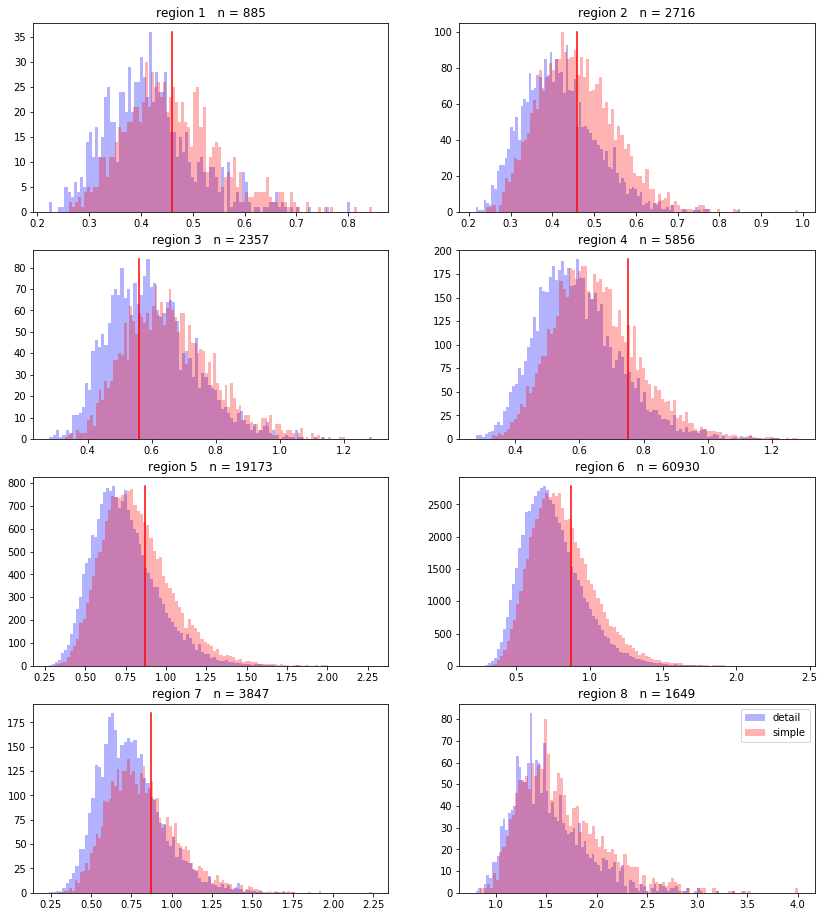

In [45]:
draw_hist_graphs_double(region, u_a, u_a_simple, 'detail', 'simple', u_a_std, True)

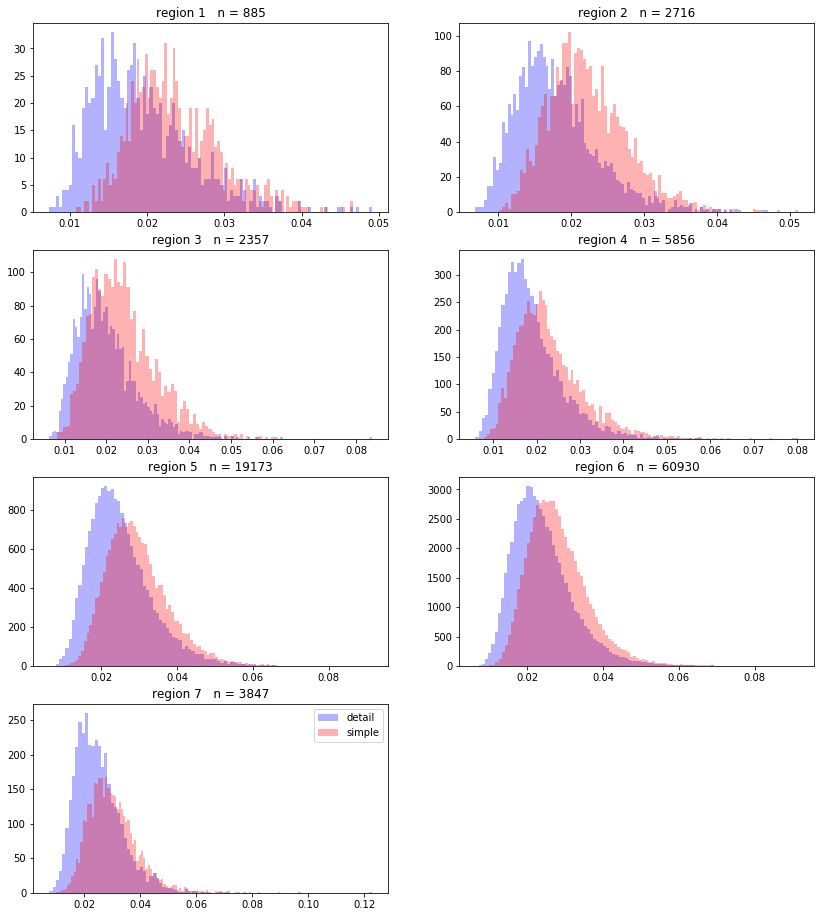

In [46]:
draw_hist_graphs_double(region, eta_ah, eta_ah_simple, 'detail', 'simple', eta_ah_std, False)

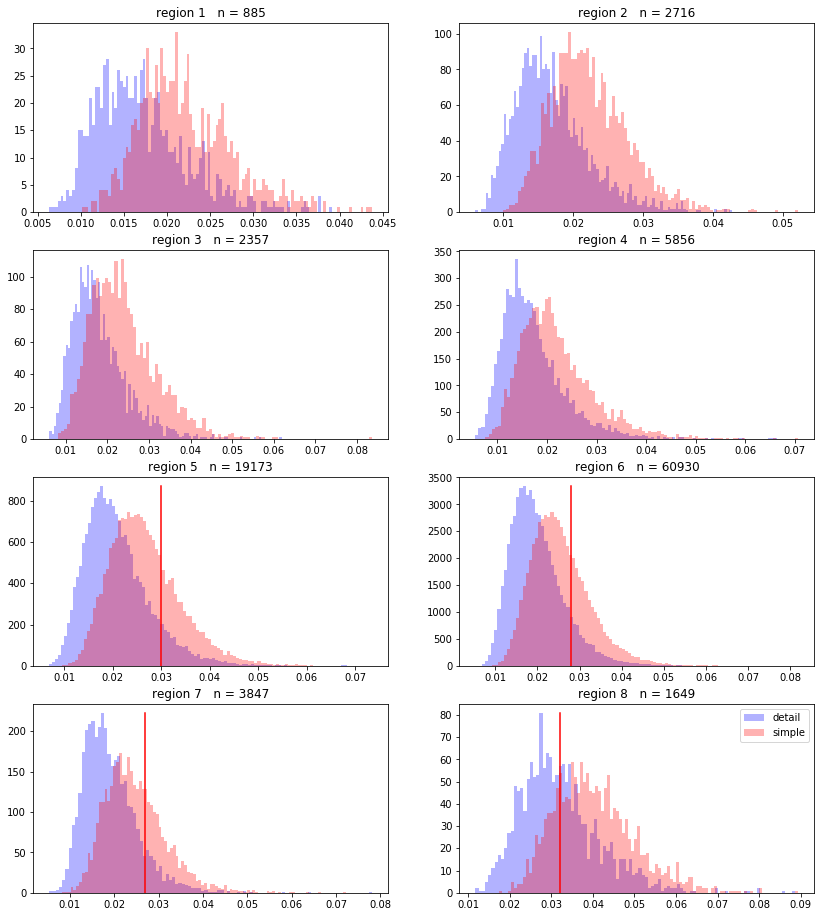

In [47]:
draw_hist_graphs_double(region, eta_ac, eta_ac_simple, 'detail', 'simple', eta_ac_std, True)

## 基準適合案件の割合

In [48]:
def count_ok(v, v_simple, std, region, target_region):
    def f(std_r, r):
        total = len(v[region==r])
        detail = len(v[(region==r)&(v<std[r-1])])
        simple = len(v[(region==r)&(v<std[r-1])&(v_simple<std[r-1])])
        return [detail/total, simple/total, simple/detail]
    return [f(std[r-1], r) for r in target_region]

In [49]:
#count_ok(u_a, u_a_simple, u_a_std, region, [1,2,3,4,5,6,7])
count_ok(u_a, u_a_simple, u_a_std, region, [1,2,3,4,5,6,7])

[[0.7480225988700565, 0.5435028248587571, 0.7265861027190332],
 [0.7161266568483063, 0.5276141384388807, 0.7367609254498715],
 [0.4187526516758591, 0.2566822231650403, 0.6129685916919959],
 [0.8777322404371585, 0.7780054644808743, 0.8863813229571984],
 [0.7584102644343608, 0.6330256089292234, 0.8346743690255141],
 [0.7589364844903989, 0.6354012801575578, 0.8372258985338005],
 [0.7665713543020536, 0.6355601767611125, 0.8290946083418108]]

In [50]:
count_ok(eta_ac, eta_ac_simple, eta_ac_std, region, [5,6,7,8])

[[0.9076826787670161, 0.7143900276430397, 0.787048210078722],
 [0.8954866239947481, 0.6786476284260627, 0.7578534511198269],
 [0.9017416168442942, 0.6651936573953731, 0.737676563851254],
 [0.5609460278956944, 0.19466343238326259, 0.34702702702702704]]

## 詳細法の値に対する簡易法の値の比

In [51]:
r_u_a = u_a_simple / u_a
r_eta_ah = eta_ah_simple / eta_ah
r_eta_ac = eta_ac_simple / eta_ac

In [52]:
def get_ave(v):
    return np.mean(v) - np.std(v), np.mean(v), np.mean(v) + np.std(v)

In [53]:
get_ave(r_u_a)

(1.0199194102306532, 1.1002159834571132, 1.1805125566835732)

In [54]:
get_ave(r_eta_ah[region != 8])

(0.9820910398634464, 1.2152205757577896, 1.448350111652133)

In [55]:
get_ave(r_eta_ac)

(1.089814085547538, 1.318759054743569, 1.5477040239396)

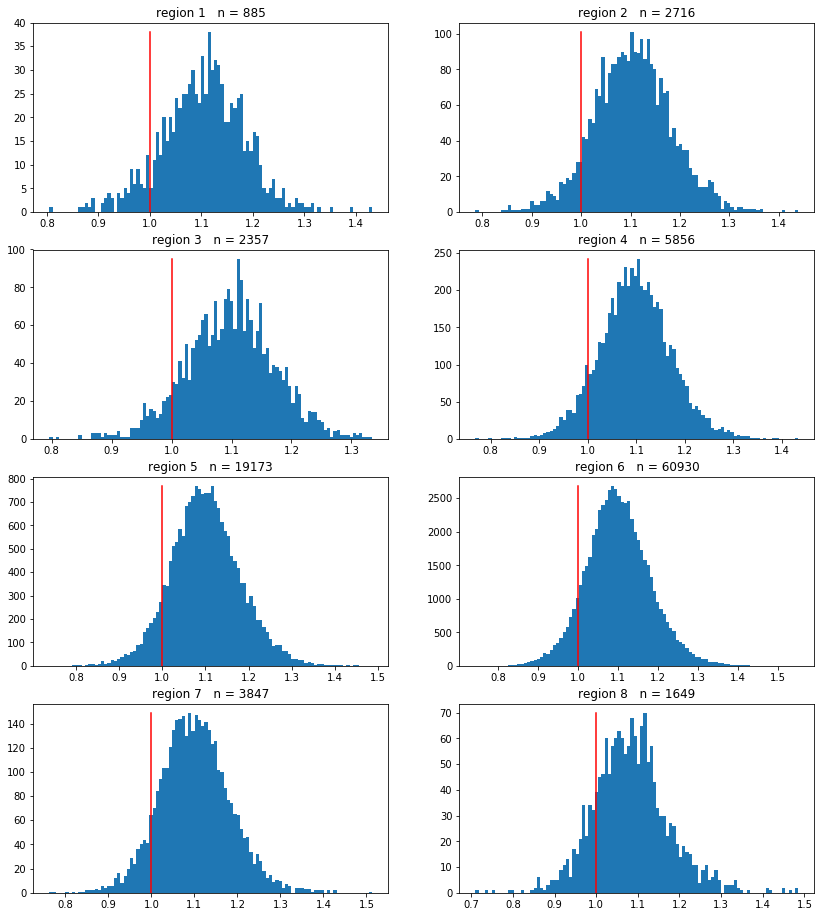

In [56]:
draw_hist_graphs(region, r_u_a, [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], True)

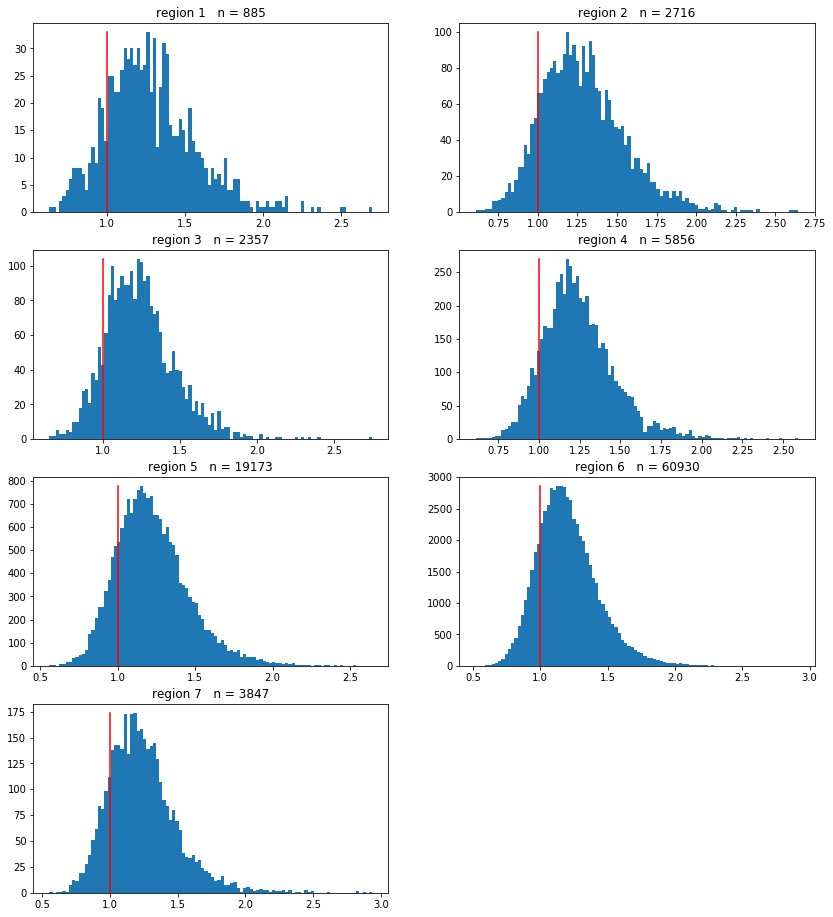

In [57]:
draw_hist_graphs(region, r_eta_ah, [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], False)

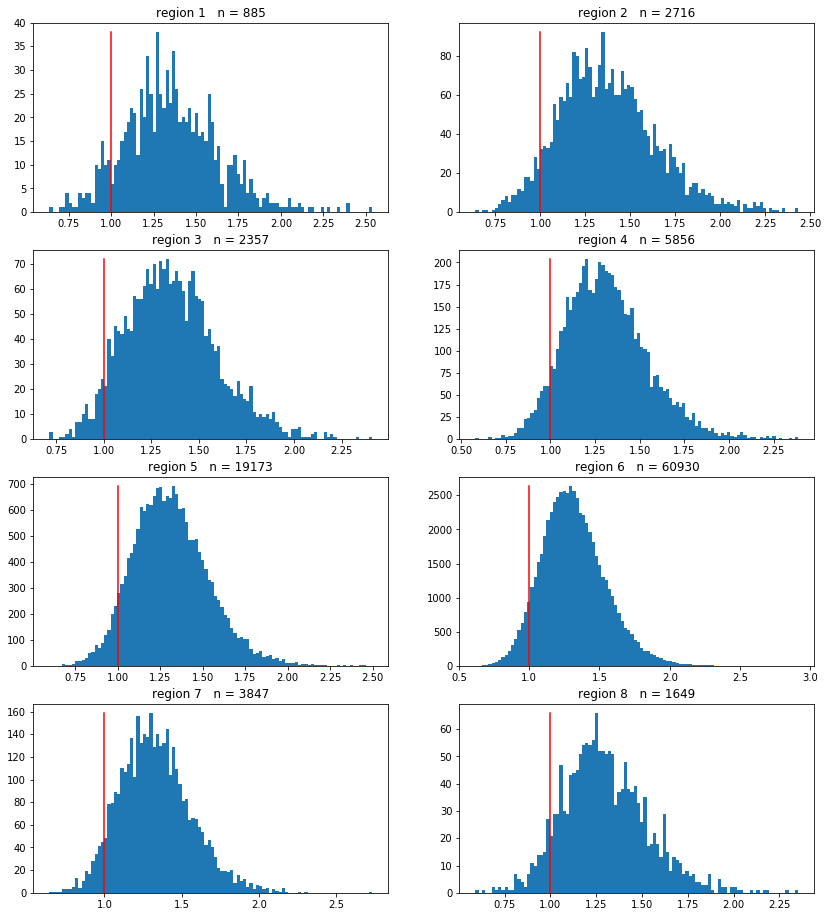

In [58]:
draw_hist_graphs(region, r_eta_ac, [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], True)

余裕率（簡易法の方が性能が良くでてしまう割合）

In [59]:
np.count_nonzero(r_u_a < 1.0) / np.count_nonzero(r_u_a)

0.09409421740424789

In [60]:
np.count_nonzero(r_eta_ah[region != 8] > 1.0) / np.count_nonzero(r_eta_ah[region != 8])

0.8361075143060023

In [61]:
np.count_nonzero(r_eta_ac < 1.0) / np.count_nonzero(r_eta_ac)

0.06471415519489185

# 開口部面積等で制限をかけた場合

## 床面積に対する開口部面積

In [62]:
a_window = np.array([h['a_evp_window_total'] for h in house])

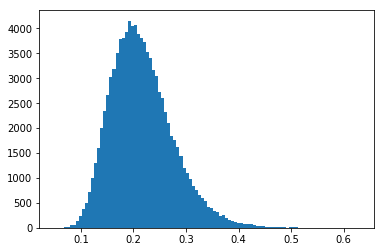

In [63]:
plt.hist(a_window/floor_area, bins=100)
plt.show()

## 制限をかけた場合のデータ

In [64]:
region_limit = region[a_window/floor_area<0.3]
u_a_limit = u_a[a_window/floor_area<0.3]
eta_ah_limit = eta_ah[a_window/floor_area<0.3]
eta_ac_limit = eta_ac[a_window/floor_area<0.3]
u_a_simple_limit = u_a_simple[a_window/floor_area<0.3]
eta_ah_simple_limit = eta_ah_simple[a_window/floor_area<0.3]
eta_ac_simple_limit = eta_ac_simple[a_window/floor_area<0.3]

## 散布図

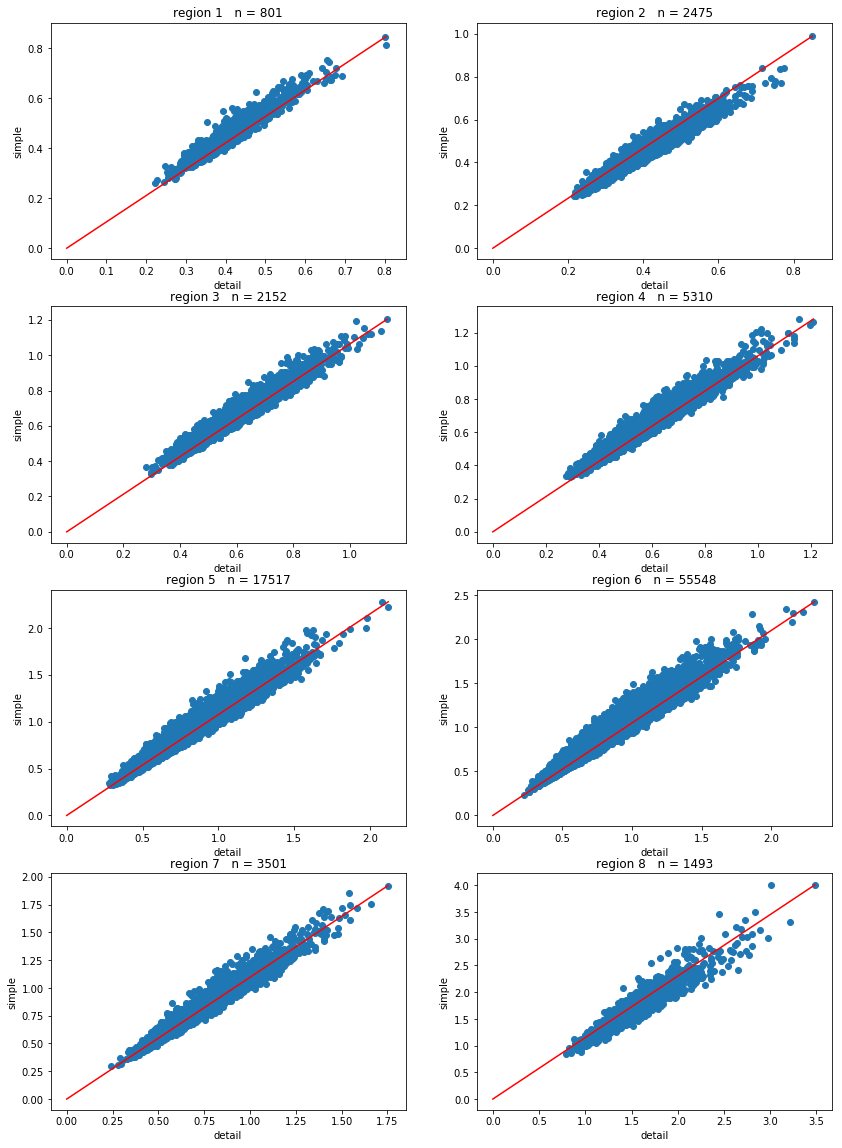

In [65]:
draw_scatter_graphs(region_limit, u_a_limit, u_a_simple_limit)

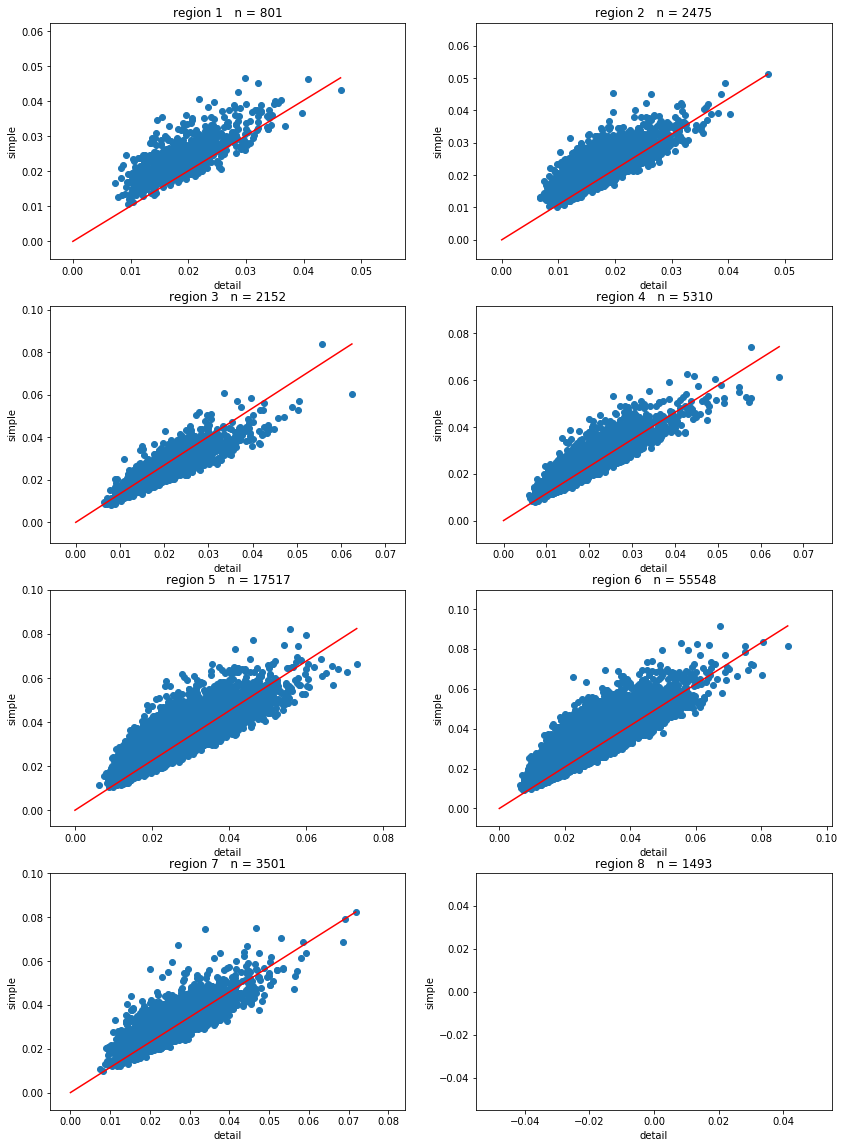

In [66]:
draw_scatter_graphs(region_limit, eta_ah_limit, eta_ah_simple_limit)

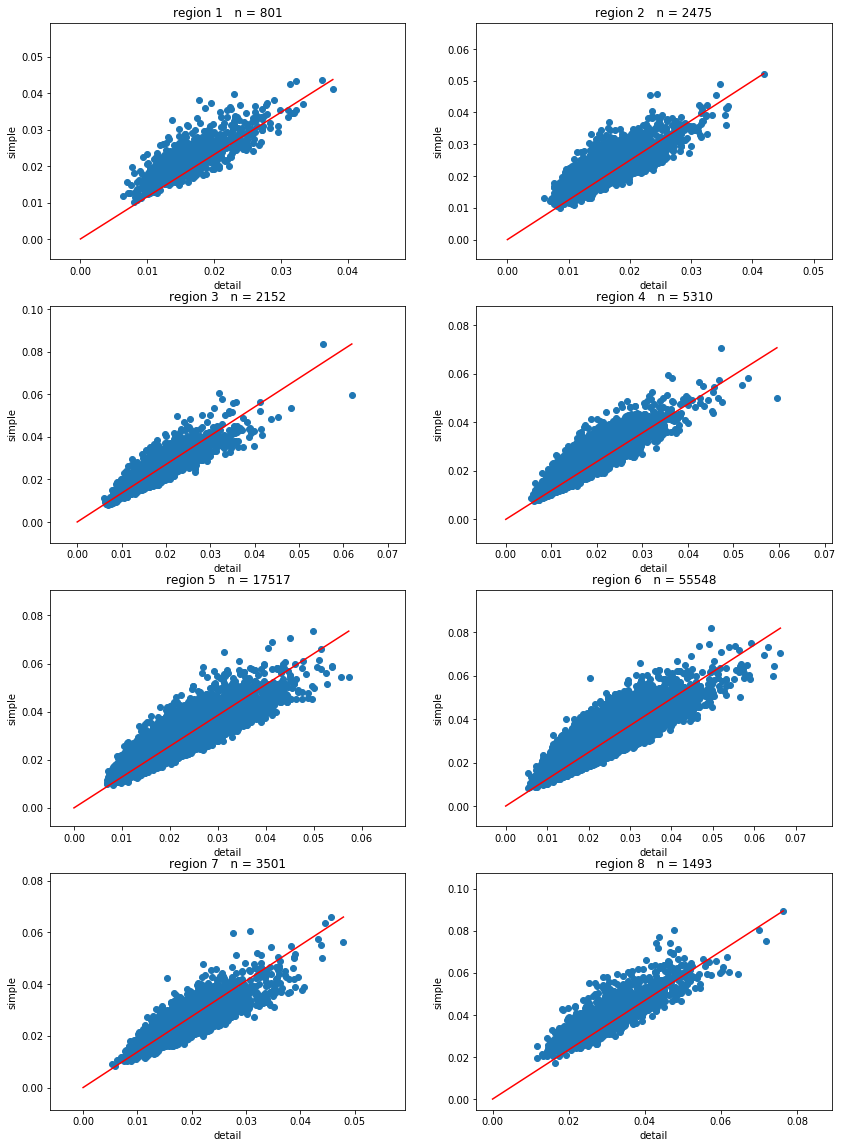

In [67]:
draw_scatter_graphs(region_limit, eta_ac_limit, eta_ac_simple_limit)

## ヒストグラム

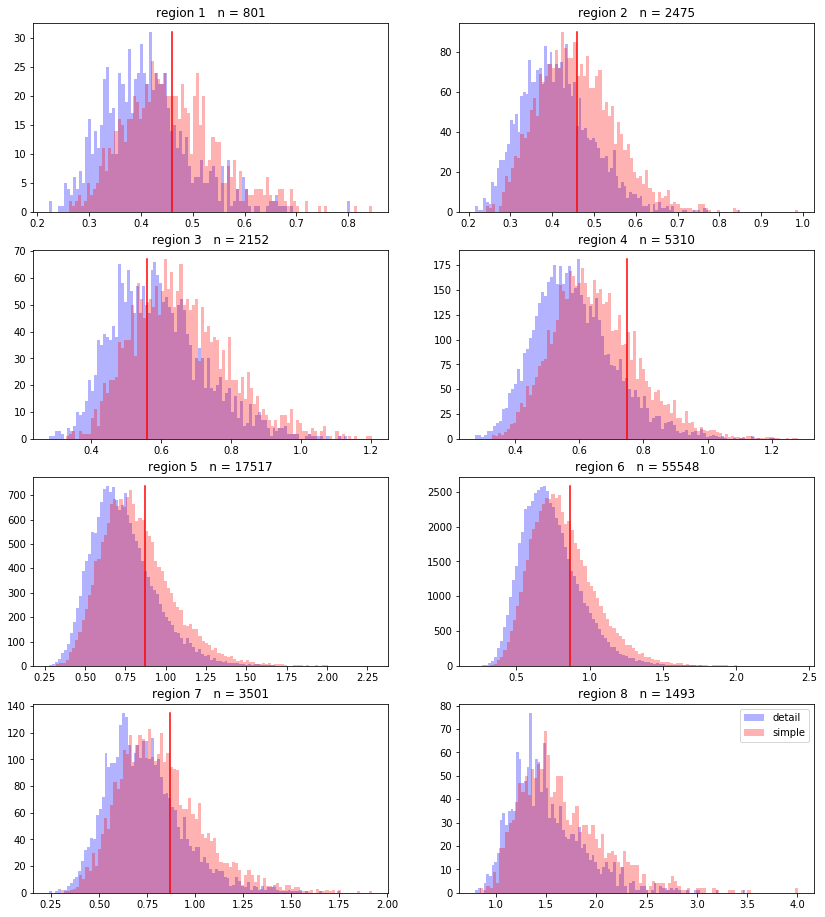

In [68]:
draw_hist_graphs_double(region_limit, u_a_limit, u_a_simple_limit, 'detail', 'simple', u_a_std, True)

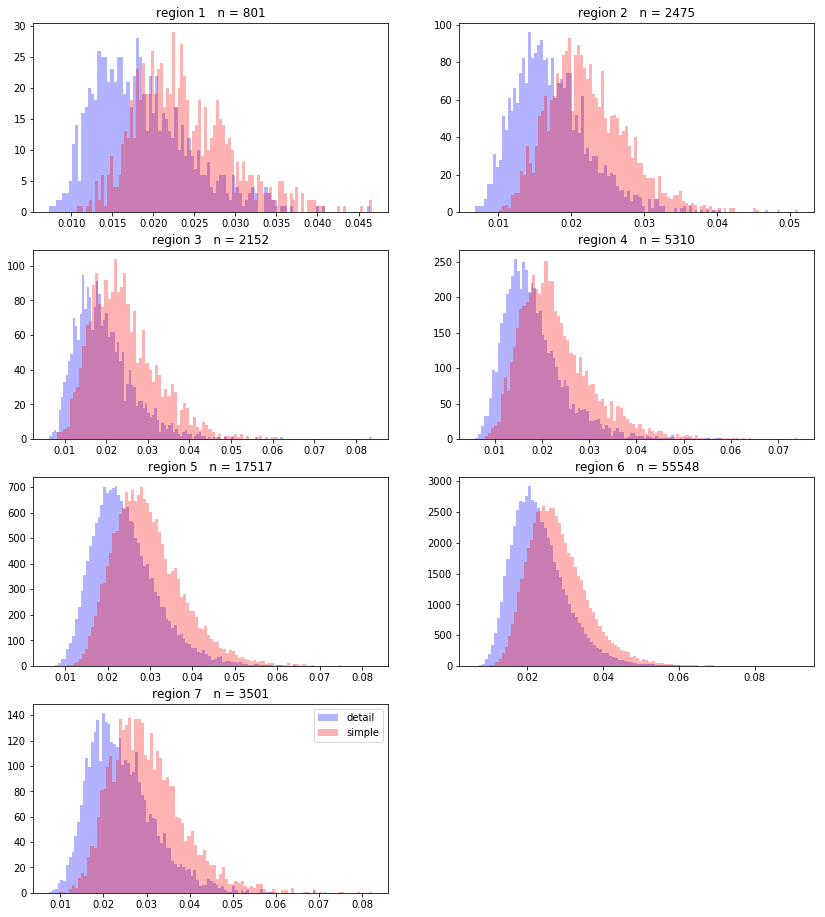

In [69]:
draw_hist_graphs_double(region_limit, eta_ah_limit, eta_ah_simple_limit, 'detail', 'simple', eta_ah_std, False)

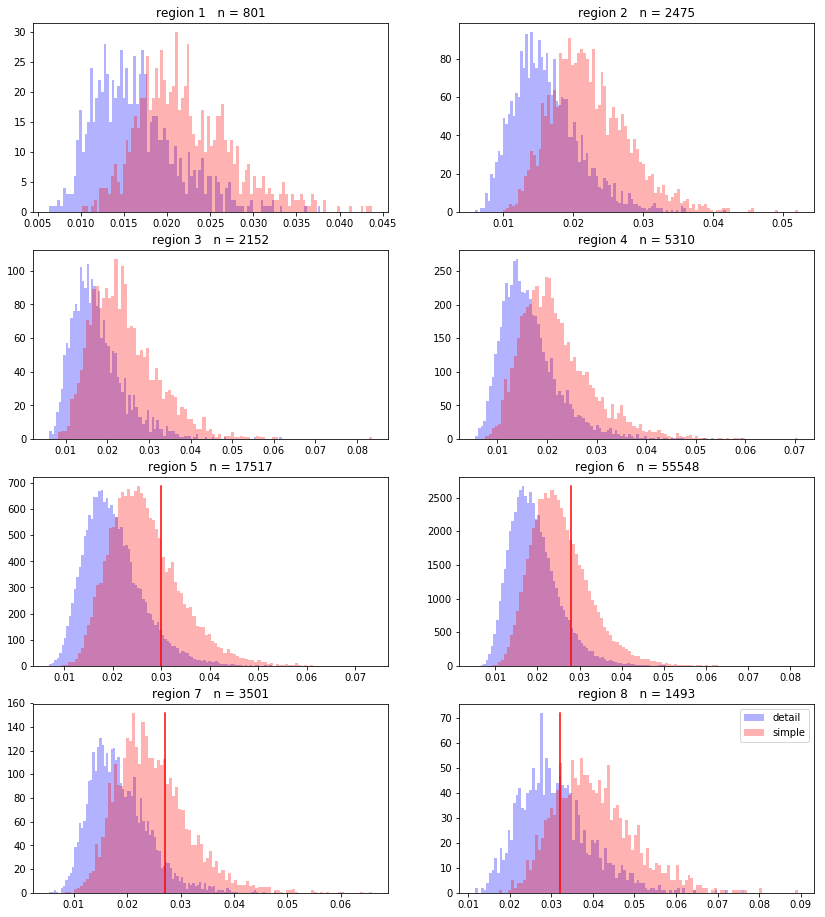

In [70]:
draw_hist_graphs_double(region_limit, eta_ac_limit, eta_ac_simple_limit, 'detail', 'simple', eta_ac_std, True)

## 基準適合案件の割合

In [71]:
count_ok(u_a_limit, u_a_simple_limit, u_a_std, region_limit, [1,2,3,4,5,6,7])

[[0.7702871410736579, 0.5455680399500624, 0.7082658022690438],
 [0.7418181818181818, 0.5353535353535354, 0.721677559912854],
 [0.43633828996282525, 0.25882899628252787, 0.5931842385516507],
 [0.8945386064030132, 0.7849340866290019, 0.8774736842105263],
 [0.775418165210938, 0.638294228463778, 0.8231613045718913],
 [0.7752934399078275, 0.6400590480305322, 0.8255700552640134],
 [0.7863467580691231, 0.6426735218508998, 0.8172902288412641]]

In [72]:
count_ok(eta_ac_limit, eta_ac_simple_limit, eta_ac_std, region_limit, [5,6,7,8])

[[0.9321230804361478, 0.7227835816635269, 0.7754164625183734],
 [0.9196910779866062, 0.6851731835529632, 0.7450036212735138],
 [0.9283061982290775, 0.6706655241359611, 0.7224615384615385],
 [0.5994641661085064, 0.1955793703951775, 0.32625698324022345]]

## 詳細法の値に対する簡易法の比

In [73]:
r_u_a_limit = u_a_simple_limit / u_a_limit
r_eta_ah_limit = eta_ah_simple_limit / eta_ah_limit
r_eta_ac_limit = eta_ac_simple_limit / eta_ac_limit

In [74]:
get_ave(r_u_a_limit)

(1.0439241363656664, 1.1136798301264985, 1.1834355238873306)

In [75]:
get_ave(r_eta_ah_limit[region_limit != 8])

(1.0282209526509223, 1.2459266479537312, 1.4636323432565401)

In [76]:
get_ave(r_eta_ac_limit)

(1.141774842433524, 1.3518916495322189, 1.5620084566309138)

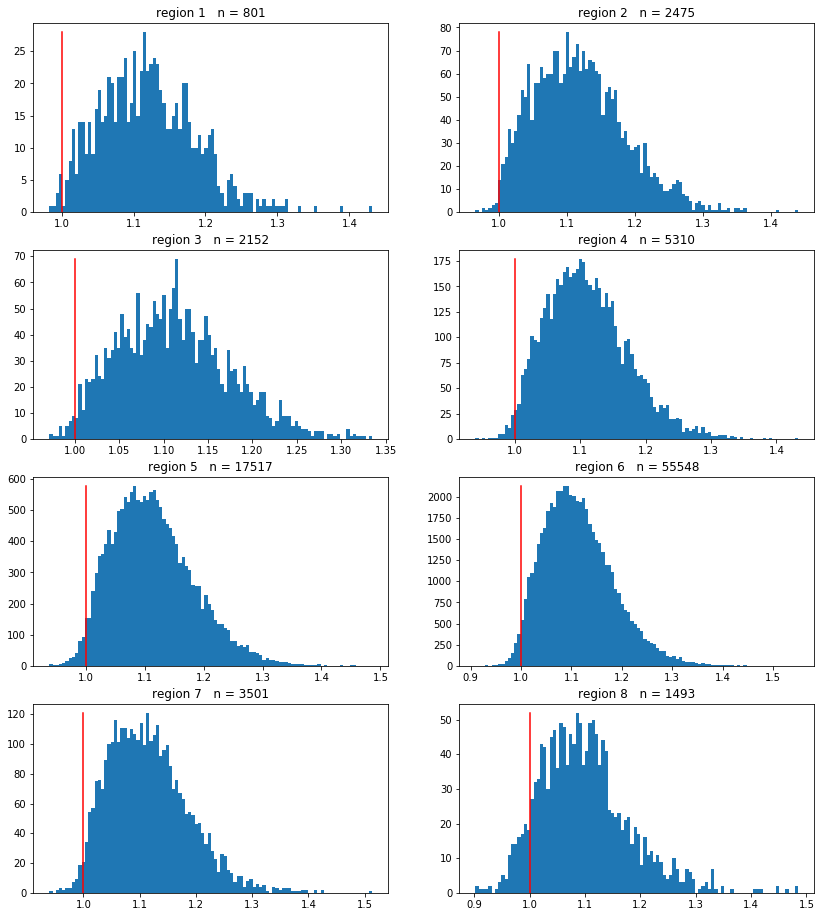

In [77]:
draw_hist_graphs(region_limit, r_u_a_limit, [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], True)

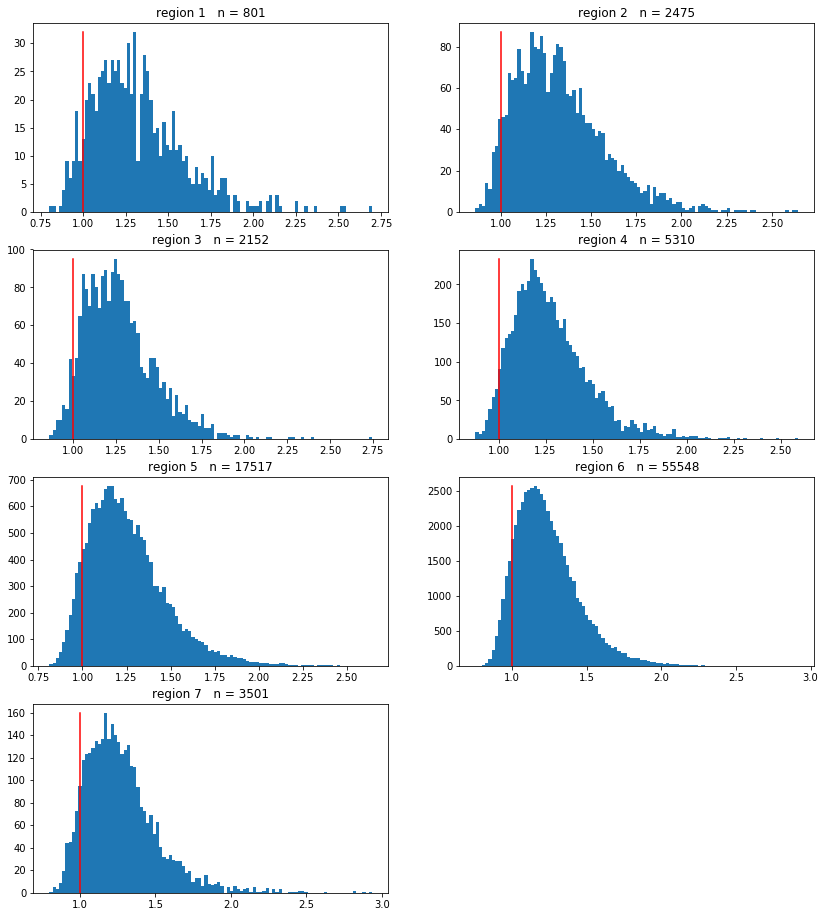

In [78]:
draw_hist_graphs(region_limit, r_eta_ah_limit, [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], False)

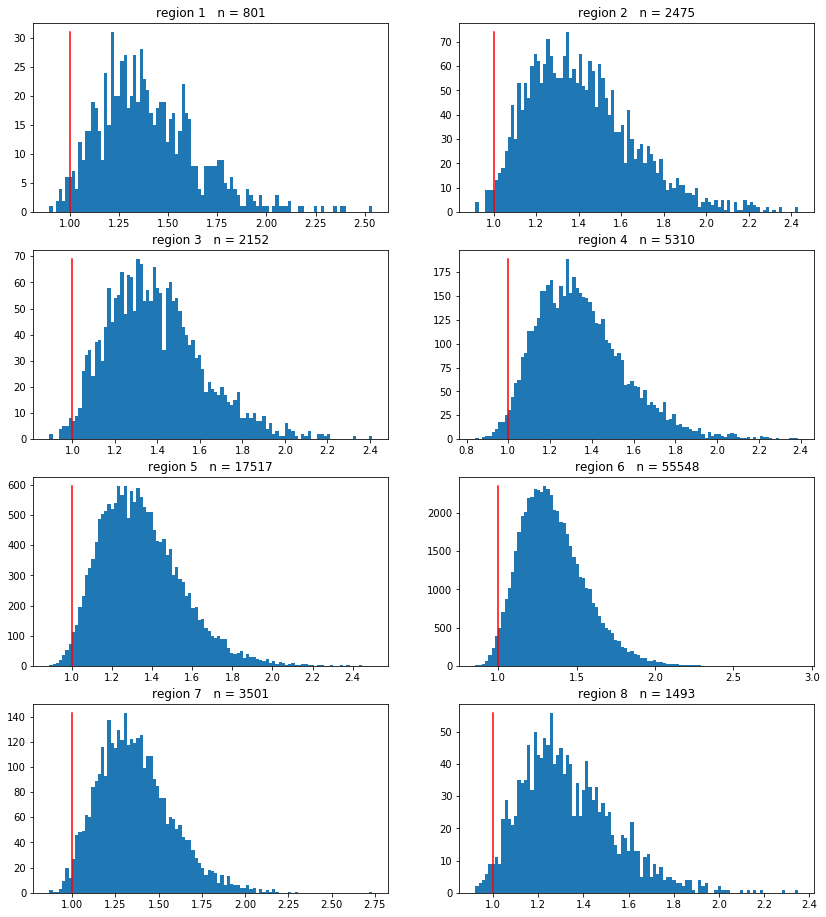

In [79]:
draw_hist_graphs(region_limit, r_eta_ac_limit, [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], True)

In [80]:
np.count_nonzero(r_u_a < 1.0) / np.count_nonzero(r_u_a)

0.09409421740424789

In [81]:
np.count_nonzero(r_u_a_limit < 1.0) / np.count_nonzero(r_u_a_limit)

0.019764181222338594

In [82]:
np.count_nonzero(r_eta_ah[region != 8] > 1.0) / np.count_nonzero(r_eta_ah[region != 8])

0.8361075143060023

In [83]:
np.count_nonzero(r_eta_ah_limit[region_limit != 8] > 1.0) / np.count_nonzero(r_eta_ah_limit[region_limit != 8])

0.9051017135526437

In [84]:
np.count_nonzero(r_eta_ac < 1.0) / np.count_nonzero(r_eta_ac)

0.06471415519489185

In [85]:
np.count_nonzero(r_eta_ac_limit < 1.0) / np.count_nonzero(r_eta_ac_limit)

0.01520321632487584